In [4]:
import collections
import os.path as osp
import numpy as np
import numpy.linalg as npla
import scipy.spatial.transform as sptf
np.set_printoptions(6, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    'font.size': 7,
})

import utils


def load_dicp_pred_poses(filename):
    data = np.loadtxt(filename, delimiter=' ')

    poses = []
    for tq in data[:, 1:]:
        T_mr = np.eye(4)
        T_mr[:3, :3] = sptf.Rotation.from_quat(tq[3:]).as_matrix()
        T_mr[:3, 3] = tq[:3]
        poses.append(T_mr)
    return np.array(poses)


def load_steam_pred_poses(filename):
    data = np.loadtxt(filename)
    poses = []
    for v in data:
        T_ms = np.eye(4)
        T_ms[:3, :] = v.reshape(3, 4)
        poses.append(T_ms)

    return np.array(poses)


def load_gt_poses(filename):
    data = np.loadtxt(filename, delimiter=' ')

    poses = []
    for tq in data[:, 1:]:
        T_mr = np.eye(4)
        T_mr[:3, :3] = sptf.Rotation.from_quat(tq[3:]).as_matrix()
        T_mr[:3, 3] = tq[:3]
        poses.append(T_mr)
    return np.array(poses)


def plot_steam_pred_poses(ax, pred_poses, gt_poses, label, color):
    T_gt_pred = gt_poses[0] @ npla.inv(pred_poses[0])
    pred_poses = T_gt_pred @ pred_poses
    ax.plot(pred_poses[:, 0, 3], pred_poses[:, 1, 3], label=label, linewidth=1.0, color=color)


def plot_dicp_pred_poses(ax, filename, gt_poses, label):
    pred_poses = load_dicp_pred_poses(filename)
    T_gt_pred = gt_poses[0] @ npla.inv(pred_poses[0])
    pred_poses = T_gt_pred @ pred_poses
    ax.plot(pred_poses[:, 0, 3], pred_poses[:, 1, 3], label=label, linewidth=1.0)


gt_path = '/media/yuchen/T7/ASRL/data/dicp'
pred_path = '/home/yuchen/ASRL/temp/doppler_odometry/dicp'

In [39]:
### compute kitti metric
sequences = [
    'brisbane-lagoon-freeway',
    'bunker-road',
    'bunker-road-vehicles',
    'robin-williams-tunnel',
    # 'san-francisco-city',
]

local_kitti_errs = collections.defaultdict(list)
local_rpe_errs = collections.defaultdict(list)

print(f"                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r")
for sequence in sequences:
  print(f"{sequence}:")
  gt_poses = load_gt_poses(osp.join(gt_path, sequence, 'ref_poses.txt'))[60:]

  ##
  pred_file = 'doppler_icp_full_range'
  pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err, err_3d = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  local_kitti_errs[pred_file].append(err_3d)
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err, pose_errors = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")
  local_rpe_errs[pred_file].extend(pose_errors)

  ##
  pred_file = 'elastic_0808_1'
  pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err, err_3d = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  local_kitti_errs[pred_file].append(err_3d)
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err, pose_errors = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")
  local_rpe_errs[pred_file].extend(pose_errors)

  ##
  pred_file = 'steam_0809_1'
  pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err, err_3d = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  local_kitti_errs[pred_file].append(err_3d)
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err, pose_errors = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")
  local_rpe_errs[pred_file].extend(pose_errors)

  ##
  pred_file = 'steam_0811_2_rv'
  pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err, err_3d = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  local_kitti_errs[pred_file].append(err_3d)
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err, pose_errors = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")
  local_rpe_errs[pred_file].extend(pose_errors)

print("average: ")
for pred_file in local_kitti_errs.keys():
  errs = local_kitti_errs[pred_file]
  t_err, r_err = utils.get_avg_stats(errs)
  print(f"{pred_file:<35} & {0.0:.2f} & {0.0:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')

  errs = local_rpe_errs[pred_file]
  t_err, r_err = utils.get_avg_rpe(errs)
  print(f"            & {0.0:.4f} & {0.0:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")


                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r
brisbane-lagoon-freeway:
doppler_icp_full_range              & 1.15 & 0.0015 & 1.72 & 0.0064            & 0.0226 & 0.0194 & 0.0494 & 0.0827 \\
elastic_0808_1                      & 1.10 & 0.0014 & 1.54 & 0.0038            & 0.0783 & 0.0269 & 0.0801 & 0.1163 \\
steam_0809_1                        & 1.69 & 0.0016 & 2.10 & 0.0040            & 0.2887 & 0.0399 & 0.2892 & 0.1195 \\
steam_0811_2_rv                     & 1.29 & 0.0015 & 1.70 & 0.0040            & 0.1309 & 0.0365 & 0.1318 & 0.1178 \\
bunker-road:
doppler_icp_full_range              & 1.10 & 0.0007 & 1.66 & 0.0330            & 0.0150 & 0.0187 & 0.0246 & 0.1357 \\
elastic_0808_1                      & 1.99 & 0.0014 & 2.83 & 0.0085            & 0.0389 & 0.0264 & 0.0401 & 0.1907 \\
steam_0809_1                        & 1.36 & 0.0011 & 2.28 & 0.0078            & 0.0536 & 0.0209 & 0.0541 & 0.1322 \\
steam_0811_2_rv           

In [5]:
### compute kitti metric
sequences = [
    'san-francisco-city',
]
sequence = sequences[0]

print(f"                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r")
for sequence in sequences:
  print(f"{sequence}:")
  gt_poses = load_gt_poses(osp.join(gt_path, sequence, 'ref_poses.txt'))[60:]

  ##
  pred_file = 'doppler_icp_40m'
  pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

  ##
  pred_file = 'elastic_0809_1_40m'
  pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

  ##
  pred_file = 'steam_0809_1_40m'
  pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

  ##
  pred_file = 'steam_0809_1_rv_40m'
  pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r
san-francisco-city:
doppler_icp_40m                     & 15.08 & 0.0467 & 21.70 & 0.0868            & 0.0228 & 0.0235 & 0.0302 & 0.0742 \\
elastic_0809_1_40m                  & 2.87 & 0.0044 & 3.71 & 0.0100            & 0.0364 & 0.0461 & 0.0394 & 0.1082 \\
steam_0809_1_40m                    & 2.48 & 0.0029 & 3.35 & 0.0085            & 0.0292 & 0.0326 & 0.0301 & 0.0824 \\
steam_0809_1_rv_40m                 & 4.03 & 0.0096 & 4.55 & 0.0128            & 0.0203 & 0.0238 & 0.0211 & 0.0771 \\


Average error: [-0.012108 -0.009808 -0.002977 -0.000076  0.000156  0.000015] Average abs error: [0.024879 0.014767 0.007424 0.00255  0.001364 0.000468]
Average error: [-0.004737 -0.009585 -0.001696 -0.000111  0.000152  0.000017] Average abs error: [0.037224 0.01287  0.007523 0.001534 0.001258 0.00038 ]
Average error: [-0.006187 -0.009381 -0.001994 -0.000113  0.000152  0.000011] Average abs error: [0.010595 0.010266 0.007319 0.001602 0.001257 0.000362]


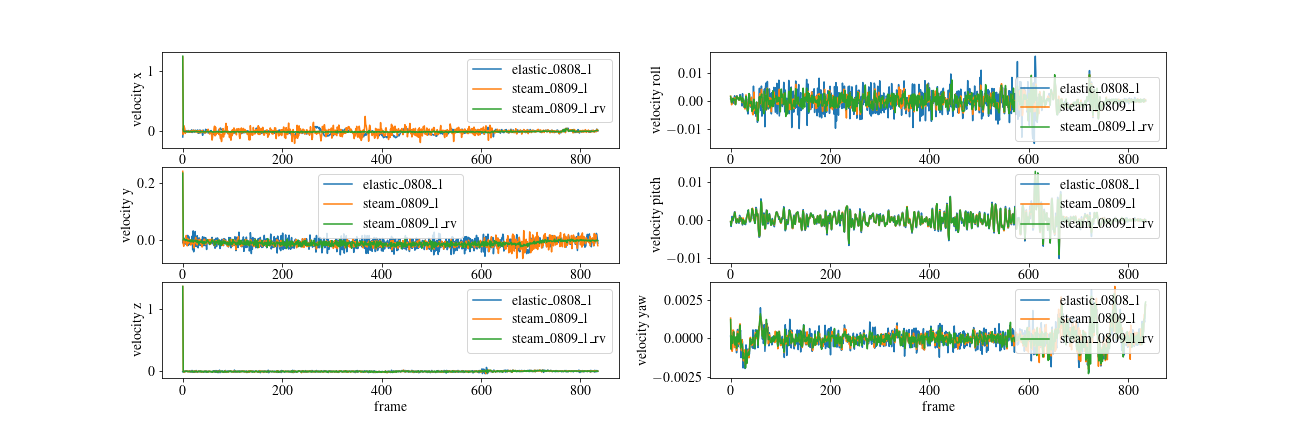

In [28]:
sequences = [
    'bunker-road',
    'bunker-road-vehicles',
    'robin-williams-tunnel',
    'brisbane-lagoon-freeway',
    # 'san-francisco-city',
]
sequence = sequences[0]

fig, ax = plt.subplots(3, 2, figsize=(18, 6))

error_file = 'elastic_0808_1'
utils.plot_error(ax, osp.join(pred_path, error_file, sequence+'_eval.txt'), label=error_file)

error_file = 'steam_0809_1'
utils.plot_error(ax, osp.join(pred_path, error_file, sequence+'_eval.txt'), label=error_file)

error_file = 'steam_0809_1_rv'
utils.plot_error(ax, osp.join(pred_path, error_file, sequence+'_eval.txt'), label=error_file)

utils.add_legend(ax, xlabel='frame')


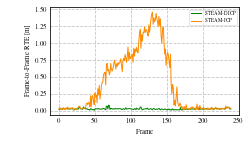

In [14]:
sequences = [
    'bunker-road',
    'bunker-road-vehicles',
    'robin-williams-tunnel',
    'brisbane-lagoon-freeway',
    # 'san-francisco-city',
]

sequence = sequences[2]

fig, ax = plt.subplots(1, 1, figsize=(3.5, 2))
fig.subplots_adjust(left=0.2, right=0.95, bottom=0.2, top=0.95, wspace=0.25, hspace=0.25)

gt_poses = load_gt_poses(osp.join(gt_path, sequence, 'ref_poses.txt'))[60:]

# ##
# pred_file = 'elastic_0808_1'
# pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
# # rpe metric
# t_err_2d, r_err_2d, t_err, r_err, pose_errors = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
# rte = [utils.translation_error(e, 3) for e in pose_errors]
# ax.plot(rte, label=pred_file)

##
pred_file = 'steam_0809_1_rv'
pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
# rpe metric
t_err_2d, r_err_2d, t_err, r_err, pose_errors = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
rte = [utils.translation_error(e, 3) for e in pose_errors]
ax.plot(rte, label="STEAM-DICP", linewidth=1.0, color='green')

##
pred_file = 'steam_0809_1'
pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
# rpe metric
t_err_2d, r_err_2d, t_err, r_err, pose_errors = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
rte = [utils.translation_error(e, 3) for e in pose_errors]
ax.plot(rte, label="STEAM-ICP", linewidth=1.0, color='darkorange')


# ##
# pred_file = 'doppler_icp_full_range'
# pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
# # rpe metric
# t_err_2d, r_err_2d, t_err, r_err, pose_errors = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
# rte = [utils.translation_error(e, 3) for e in pose_errors]
# ax.plot(rte, label=pred_file)

ax.set_ylabel('Frame-to-Frame RTE [m]')
ax.set_xlabel('Frame')
ax.grid(which='both', linestyle='--', alpha=0.75)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.legend(framealpha=0.5, fontsize=5)

plt.savefig('/home/yuchen/ASRL/notes/2023-icra-wu/figs/seq02_local_rte.pdf', format="pdf", bbox_inches="tight")
plt.show()

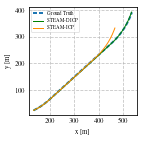

In [13]:
sequences = [
    # 'bunker-road',
    # 'bunker-road-vehicles',
    'robin-williams-tunnel',
    # 'brisbane-lagoon-freeway',
    # 'san-francisco-city',
]

fig, axs = plt.subplots(1, len(sequences), figsize=(2, 2))
fig.subplots_adjust(left=0.2, right=0.95, bottom=0.2, top=0.95, wspace=0.25, hspace=0.25)

for i, sequence in enumerate(sequences):
    ax = axs[i] if len(sequences) > 1 else axs

    gt_poses = load_gt_poses(osp.join(gt_path, sequence, 'ref_poses.txt'))[60:]
    ax.plot(gt_poses[:, 0, 3], gt_poses[:, 1, 3], "--", label='Ground Truth', linewidth=2.0, dashes=(2, 1))

    # pred_file = 'doppler_icp_full_range'
    # pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
    # plot_steam_pred_poses(ax, pred_poses, gt_poses, 'doppler')

    # pred_file = 'elastic_0808_1'
    # pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
    # plot_steam_pred_poses(ax, pred_poses, gt_poses, 'elastic')

    pred_file = 'steam_0809_1_rv'
    pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
    plot_steam_pred_poses(ax, pred_poses, gt_poses, 'STEAM-DICP', 'green')

    pred_file = 'steam_0809_1'
    pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[60:]
    plot_steam_pred_poses(ax, pred_poses, gt_poses, 'STEAM-ICP', 'darkorange')

    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    # ax.set_title(sequence)
    ax.grid(which='both', linestyle='--', alpha=0.75)
    # ax.set_aspect('equal', 'box')
    ax.legend(framealpha=0.5, fontsize=5)
    ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig('/home/yuchen/ASRL/notes/2023-icra-wu/figs/seq02_path.pdf', format="pdf", bbox_inches="tight")
plt.show()

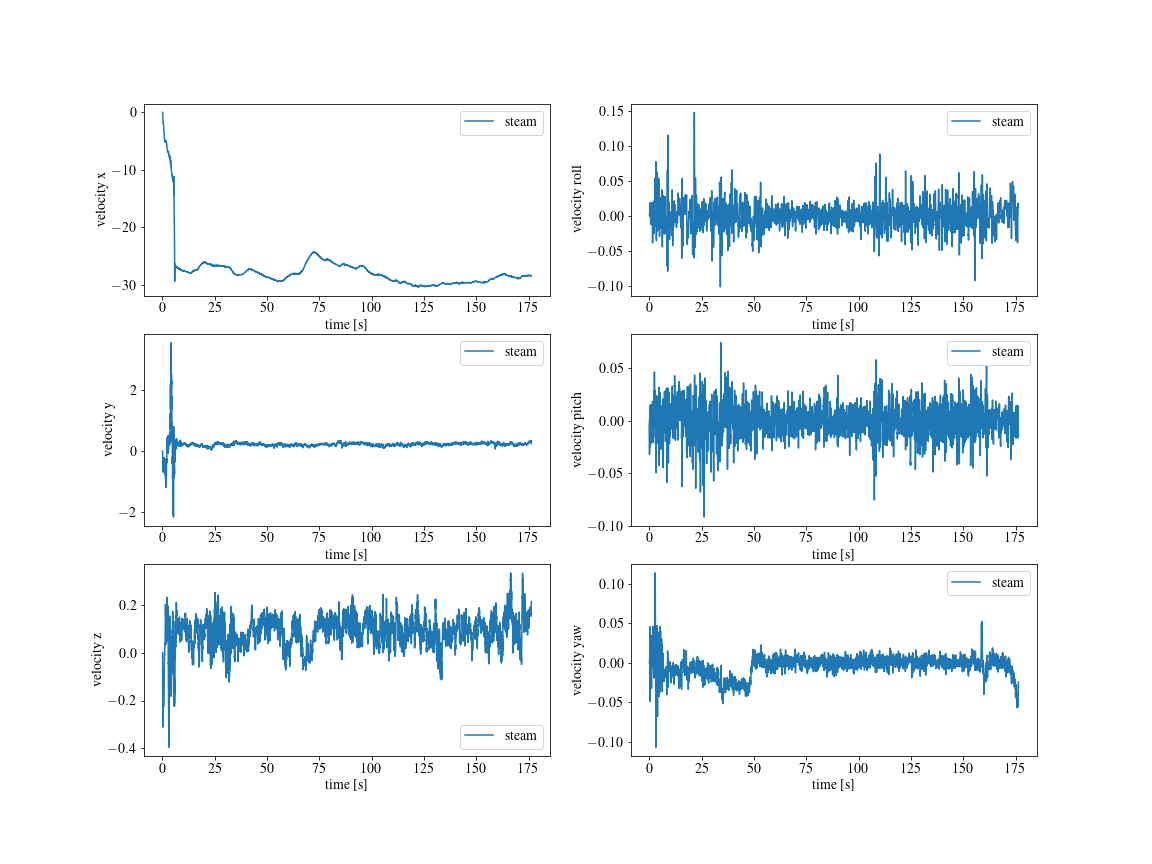

In [34]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

# utils.add_plot_velocity(ax, '/home/yuchen/ASRL/temp/doppler_odometry/boreas/aeva/steam_0809_1/trajectory_1660021670.txt', 'elastic')
utils.add_plot_velocity(ax, '/home/yuchen/ASRL/temp/doppler_odometry/dicp/steam_0809_1_rv/trajectory_1660095138.txt', 'steam')
# utils.add_plot_pose(ax, '/home/yuchen/ASRL/temp/doppler_odometry/dicp/steam_0809_1/trajectory_1660093704.txt', 'steam')

utils.add_legend(ax)
plt.show()